In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import cm
import numpy as np

In [2]:
import matplotlib.gridspec as gridspec

In [3]:
### read Stage info
df_ocs_control_AB = pd.read_pickle('pkl_files/df_ocs_control_AB.pkl'); 
df_ocs_fixedSM_AB = pd.read_pickle('pkl_files/df_ocs_fixedSM_AB.pkl'); 
df_ocs_control_SESA = pd.read_pickle('pkl_files/df_ocs_control_SESA.pkl'); 
df_ocs_fixedSM_SESA = pd.read_pickle('pkl_files/df_ocs_fixedSM_SESA.pkl'); 

In [4]:
df_ocs_control_AB.columns

Index(['index', 'feature', 'time', 'idx', 'area', 'mean', 'tot_prec',
       'max_prec', 'hdim_1', 'hdim_2', 'longitude', 'latitude', 'time_zone',
       'local_time', 'mean_ob', 'area_ob', 'radius', 'mean_SM', 'max_SM',
       'std_SM', 'frame', 'cell', 'time_cell', 'idxn', 'stage', 'topo_mean',
       'topo_median', 'topo_std', 'topo_max'],
      dtype='object')

In [5]:
#Read 2-times-radio-distance Soil moisture:
sm_env_c_2r = pd.read_pickle('pkl_files/sm_env_all_c_2r_notoprivr.pkl')
sm_env_f_2r = pd.read_pickle('pkl_files/sm_env_all_f_2r_notoprivr.pkl')
sm_env_c_sesa_2r = pd.read_pickle('pkl_files/sm_env_all_c_SESA_2r_notoprivr.pkl')
sm_env_f_sesa_2r = pd.read_pickle('pkl_files/sm_env_all_f_SESA_2r_notoprivr.pkl')

In [6]:
#Read 2-times-radio-distance TQV:
tqv_env_c_2r = pd.read_pickle('pkl_files/tqv_env_all_c_2r_notoprivr.pkl')
tqv_env_f_2r = pd.read_pickle('pkl_files/tqv_env_all_f_2r_notoprivr.pkl')
tqv_env_c_sesa_2r = pd.read_pickle('pkl_files/tqv_env_all_c_SESA_2r_notoprivr.pkl')
tqv_env_f_sesa_2r = pd.read_pickle('pkl_files/tqv_env_all_f_SESA_2r_notoprivr.pkl')

In [7]:
def add_SMvars_to_df(df1, df2, default_varname1 = 'std_SM_env', varname1='SM_std_env', default_varname2='mean_SM_env', varname2='SM_mean_env'):
    """
    Add columns from df2 to df1 based on matching 'feature' column values.
    
    df1: The dataframe where columns are added.
    df2: The dataframe whose columns are extracted.
    varname1 (str): The name of the mean column in df2 after renaming (default 'SM_mean_env_3hb').
    varname2 (str): The name of the std deviation column in df2 after renaming (default 'SM_std_env_3hb').

    Returns:
    DataFrame: The merged DataFrame with new columns added from df2.
    """
    # Copy df2 to avoid changing it outside of the function's scope
    df2_copy = df2.copy()
    
    # Rename columns to prevent conflicts during merge
    df2_copy.rename(columns={default_varname1: varname1, default_varname2: varname2}, inplace=True)
    
    # Check if 'feature' column exists in both dataframes
    if 'feature' not in df1.columns or 'feature' not in df2_copy.columns:
        raise KeyError("'feature' column must exist in both dataframes.")
    
    # Merge the dataframes on the 'feature' column with a left join
    merged_df = pd.merge(df1, df2_copy[['feature', varname1, varname2]], on='feature', how='left')
    
    return merged_df

In [8]:
print(len(sm_env_c_2r),len(df_ocs_control_AB[(df_ocs_control_AB.longitude>-76.5)&(df_ocs_control_AB.longitude<-55.5)]))

4823 4823


In [9]:
df_2r_c_AB = add_SMvars_to_df(df_ocs_control_AB[(df_ocs_control_AB.longitude>-76.5)&(df_ocs_control_AB.longitude<-55.5)],sm_env_c_2r.reset_index(drop=True));
df_2r_f_AB = add_SMvars_to_df(df_ocs_fixedSM_AB[(df_ocs_fixedSM_AB.longitude>-76.5)&(df_ocs_fixedSM_AB.longitude<-55.5)],sm_env_f_2r.reset_index(drop=True));

df_2r_c_SESA = add_SMvars_to_df(df_ocs_control_SESA[(df_ocs_control_SESA.longitude>-76.5)&(df_ocs_control_SESA.latitude>-24.5)],sm_env_c_sesa_2r.reset_index(drop=True));
df_2r_f_SESA = add_SMvars_to_df(df_ocs_fixedSM_SESA[(df_ocs_fixedSM_SESA.longitude>-76.5)&(df_ocs_fixedSM_SESA.latitude>-24.5)],sm_env_f_sesa_2r.reset_index(drop=True));


In [10]:
tqv_env_c_2r.columns

Index(['time', 'local_time', 'feature', 'mean_TQV_env', 'std_TQV_env'], dtype='object')

In [11]:
df_2r_c_AB = add_SMvars_to_df(df_2r_c_AB,tqv_env_c_2r.reset_index(drop=True),default_varname1='std_TQV_env',varname1='TQV_std_env',default_varname2='mean_TQV_env', varname2='TQV_mean_env');
df_2r_f_AB = add_SMvars_to_df(df_2r_f_AB,tqv_env_f_2r.reset_index(drop=True),default_varname1='std_TQV_env',varname1='TQV_std_env',default_varname2='mean_TQV_env', varname2='TQV_mean_env');

df_2r_c_SESA = add_SMvars_to_df(df_2r_c_SESA,tqv_env_c_sesa_2r.reset_index(drop=True),default_varname1='std_TQV_env',varname1='TQV_std_env',default_varname2='mean_TQV_env', varname2='TQV_mean_env');
df_2r_f_SESA = add_SMvars_to_df(df_2r_f_SESA,tqv_env_f_sesa_2r.reset_index(drop=True),default_varname1='std_TQV_env',varname1='TQV_std_env',default_varname2='mean_TQV_env', varname2='TQV_mean_env');


In [12]:
def bootstrap_error(data, bins, n_samples):
    samples = np.random.choice(data, (n_samples, len(data)), replace=True)
    histograms = [np.histogram(sample, bins=bins)[0] for sample in samples]
    percentual_frequencies = [100*hist / hist.sum() for hist in histograms]
    return percentual_frequencies

In [13]:
def get_hist(df, bins):
    hist, _ = np.histogram(df, bins)
    percent = [100*i/sum(hist) for i in hist]
    return percent

In [14]:
# Define a function to set the y-limits, y-scale, and title
def set_plot_props(ax, title,tsize=10,yi=6,yf=49, log=True):
    if log==True:
        ax.set_yscale('log'); 
    ax.set_ylim(yi, yf); ax.set_title(title,fontsize=tsize); ax.set_xlabel('Frequency [%]')
    

# Define a function to add horizontal lines for the quantiles
def add_quantile_lines(ax, df, color, column='mean_tqv',qs=[0.25, 0.5, 0.75]):
    quantiles = qs;    
    for q in quantiles:
        y_coord = df.quantile(q)[column]
        ax.axhline(y=y_coord, color=color, ls='--', lw=0.8)

In [15]:
# Define common properties
colors = {'low_SM_std': 'mediumblue', 'high_SM_std': 'darkorange'}
colors_exp = {'control': 'darkcyan', 'fixedSM': 'dimgrey'}
lw = 1.5
errorbar_propsc = {'fmt': 'none', 'ecolor': 'darkcyan', 'capsize': 3}
errorbar_propsf = {'fmt': 'none', 'ecolor': 'dimgrey', 'capsize': 3}

In [16]:
errorbar_propsk = {'fmt': 'none', 'ecolor': 'k', 'capsize': 3}

In [17]:
errorbar_propsHH = {'fmt': 'none', 'ecolor': 'darkorange', 'capsize': 3,'alpha':0.3}
errorbar_propsLH = {'fmt': 'none', 'ecolor': 'mediumblue', 'capsize': 3,'alpha':0.3}

### Slicing objects within the domain box and whose duration considers at least "t_i" and "t_m" stages

In [18]:
##define subregions representative of AB and SESA
df_env_AB_c = df_2r_c_AB[(df_2r_c_AB.latitude<3)&(df_2r_c_AB.latitude>-7)&(df_2r_c_AB.longitude>-73)&(df_2r_c_AB.longitude<-58)]
df_env_AB_f = df_2r_f_AB[(df_2r_f_AB.latitude<3)&(df_2r_f_AB.latitude>-7)&(df_2r_f_AB.longitude>-73)&(df_2r_f_AB.longitude<-58)]

df_env_SESA_c = df_2r_c_SESA[(df_2r_c_SESA.latitude<=-14)&(df_2r_c_SESA.latitude>=-24)&(df_2r_c_SESA.longitude>=-65)&(df_2r_c_SESA.longitude<=-50)]
df_env_SESA_f = df_2r_f_SESA[(df_2r_f_SESA.latitude<=-14)&(df_2r_f_SESA.latitude>=-24)&(df_2r_f_SESA.longitude>=-65)&(df_2r_f_SESA.longitude<=-50)]

In [19]:
###Make sure dataframes contain at least both "t_i" and "t_m" stages
dfilt_env_AB_c = df_env_AB_c.groupby('cell').filter(lambda x: 't_i' in x['stage'].values and 't_m' in x['stage'].values)
dfilt_env_AB_f = df_env_AB_f.groupby('cell').filter(lambda x: 't_i' in x['stage'].values and 't_m' in x['stage'].values)

dfilt_env_SESA_c = df_env_SESA_c.groupby('cell').filter(lambda x: 't_i' in x['stage'].values and 't_m' in x['stage'].values)
dfilt_env_SESA_f = df_env_SESA_f.groupby('cell').filter(lambda x: 't_i' in x['stage'].values and 't_m' in x['stage'].values)

In [20]:
dfilt_env_AB_c['max_prec'] = pd.to_numeric(dfilt_env_AB_c['max_prec'],errors = 'coerce');
dfilt_env_AB_f['max_prec'] = pd.to_numeric(dfilt_env_AB_f['max_prec'],errors = 'coerce');

In [21]:
dfilt_env_SESA_c['max_prec'] = pd.to_numeric(dfilt_env_SESA_c['max_prec'],errors = 'coerce');
dfilt_env_SESA_f['max_prec'] = pd.to_numeric(dfilt_env_SESA_f['max_prec'],errors = 'coerce');

In [22]:
from scipy.stats import mannwhitneyu

In [23]:
def write_significance(data_low, data_high):   
    stat, p = mannwhitneyu(data_low, data_high)
    
    return(p)

#### Number of systems per experiment

In [25]:
df_AB_c = dfilt_env_AB_c[(dfilt_env_AB_c.topo_median<500)&(dfilt_env_AB_c.topo_std<150)]; 
df_AB_f = dfilt_env_AB_f[(dfilt_env_AB_f.topo_median<500)&(dfilt_env_AB_f.topo_std<150)]

print(len(df_AB_c.cell.unique()),len(df_AB_f.cell.unique()))

205 217


In [26]:
df_SESA_c = dfilt_env_SESA_c[(dfilt_env_SESA_c.topo_median<500)&(dfilt_env_SESA_c.topo_std<150)]; 
df_SESA_f = dfilt_env_SESA_f[(dfilt_env_SESA_f.topo_median<500)&(dfilt_env_SESA_f.topo_std<150)]

print(len(df_SESA_c.cell.unique()),len(df_SESA_f.cell.unique()))

42 56


### Figure 2 (Size & intensity distributions)

In [28]:
bingS = (np.logspace(np.log10(2500),np.log10(7e4),9));

In [29]:
outplot = '/scratch/wcq7pz/output_plots/'

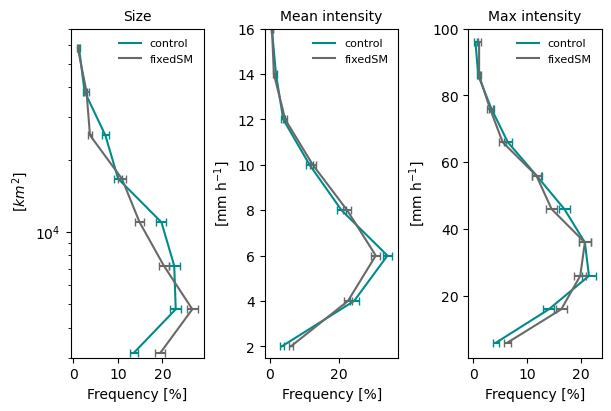

In [30]:
bingS = (np.logspace(np.log10(2500),np.log10(7e4),9)); mid_bins = 0.5*(bingS[1:]+bingS[:-1])
f, axs = plt.subplots(1, 3, figsize=(6, 4),layout='constrained'); i=0; lw=1.5; sample=1000;
df_AB_c = dfilt_env_AB_c[(dfilt_env_AB_c.topo_median<500)&(dfilt_env_AB_c.topo_std<150)]; 
df_AB_f = dfilt_env_AB_f[(dfilt_env_AB_f.topo_median<500)&(dfilt_env_AB_f.topo_std<150)]

p1 = get_hist(df_AB_c['area_ob'],bingS); p2 = get_hist(df_AB_f['area_ob'],bingS);
axs[0].plot( p1, mid_bins, label='control', color=colors_exp['control'], linewidth=lw);
axs[0].plot( p2, mid_bins, label='fixedSM', color=colors_exp['fixedSM'], linewidth=lw);
axs[0].errorbar(p1, mid_bins, xerr= np.std(bootstrap_error(df_AB_c['area_ob'], bingS, sample), axis=0), **errorbar_propsc)
axs[0].errorbar(p2, mid_bins, xerr= np.std(bootstrap_error(df_AB_f['area_ob'], bingS, sample), axis=0), **errorbar_propsf)
axs[0].legend(fontsize=8,frameon=False); set_plot_props(axs[0], 'Size',yi=3e3,yf=7e4);  axs[0].set_ylabel(' [$km ^{2}$]'); 

bingM = np.arange(1,18,2); mid_bins = 0.5*(bingM[1:]+bingM[:-1])
p1 = get_hist(df_AB_c['mean_ob'],bingM); p2 = get_hist(df_AB_f['mean_ob'],bingM);
axs[1].plot( p1, mid_bins, label='control', color=colors_exp['control'], linewidth=lw);
axs[1].plot( p2, mid_bins, label='fixedSM', color=colors_exp['fixedSM'], linewidth=lw);
axs[1].errorbar(p1, mid_bins, xerr= np.std(bootstrap_error(df_AB_c['mean_ob'], bingM, sample), axis=0), **errorbar_propsc)
axs[1].errorbar(p2, mid_bins, xerr= np.std(bootstrap_error(df_AB_f['mean_ob'], bingM, sample), axis=0), **errorbar_propsf)
axs[1].legend(fontsize=8,frameon=False); set_plot_props(axs[1], 'Mean intensity',yi=1.5,yf=16, log=False);  axs[1].set_ylabel('[mm h$^{-1}$]'); 

bingM = np.arange(1,110,10); mid_bins = 0.5*(bingM[1:]+bingM[:-1])
p1 = get_hist(df_AB_c['max_prec'],bingM); p2 = get_hist(df_AB_f['max_prec'],bingM);
axs[2].plot( p1, mid_bins, label='control', color=colors_exp['control'], linewidth=lw);
axs[2].plot( p2, mid_bins, label='fixedSM', color=colors_exp['fixedSM'], linewidth=lw);
axs[2].errorbar(p1, mid_bins, xerr= np.std(bootstrap_error(df_AB_c['max_prec'], bingM, sample), axis=0), **errorbar_propsc)
axs[2].errorbar(p2, mid_bins, xerr= np.std(bootstrap_error(df_AB_f['max_prec'], bingM, sample), axis=0), **errorbar_propsf)
axs[2].legend(fontsize=8,frameon=False); set_plot_props(axs[2], 'Max intensity',yi=1.5,yf=100, log=False);  axs[2].set_ylabel('[mm h$^{-1}$]'); 

plt.savefig(outplot+"Fig2_AB.pdf", format="pdf",dpi=300,  bbox_inches="tight")

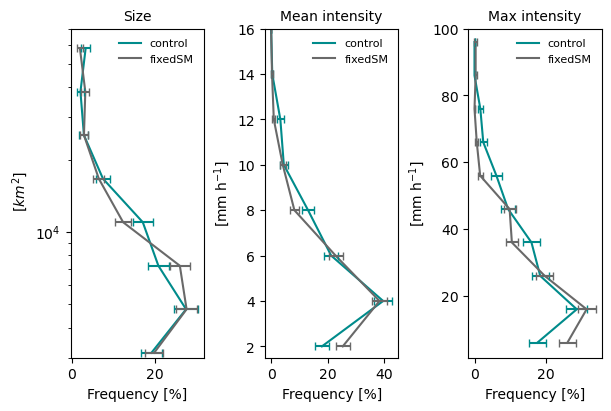

In [31]:
bingS = (np.logspace(np.log10(2500),np.log10(7e4),9)); mid_bins = 0.5*(bingS[1:]+bingS[:-1])
f, axs = plt.subplots(1, 3, figsize=(6, 4),layout='constrained'); i=0; lw=1.5; sample=1000;
df_AB_c = dfilt_env_SESA_c[(dfilt_env_SESA_c.topo_median<500)&(dfilt_env_SESA_c.topo_std<150)]; 
df_AB_f = dfilt_env_SESA_f[(dfilt_env_SESA_f.topo_median<500)&(dfilt_env_SESA_f.topo_std<150)]

p1 = get_hist(df_AB_c['area_ob'],bingS); p2 = get_hist(df_AB_f['area_ob'],bingS);
axs[0].plot( p1, mid_bins, label='control', color=colors_exp['control'], linewidth=lw);
axs[0].plot( p2, mid_bins, label='fixedSM', color=colors_exp['fixedSM'], linewidth=lw);
axs[0].errorbar(p1, mid_bins, xerr= np.std(bootstrap_error(df_AB_c['area_ob'], bingS, sample), axis=0), **errorbar_propsc)
axs[0].errorbar(p2, mid_bins, xerr= np.std(bootstrap_error(df_AB_f['area_ob'], bingS, sample), axis=0), **errorbar_propsf)
axs[0].legend(fontsize=8,frameon=False); set_plot_props(axs[0], 'Size',yi=3e3,yf=7e4);  axs[0].set_ylabel(' [$km ^{2}$]'); 

bingM = np.arange(1,18,2); mid_bins = 0.5*(bingM[1:]+bingM[:-1])
p1 = get_hist(df_AB_c['mean_ob'],bingM); p2 = get_hist(df_AB_f['mean_ob'],bingM);
axs[1].plot( p1, mid_bins, label='control', color=colors_exp['control'], linewidth=lw);
axs[1].plot( p2, mid_bins, label='fixedSM', color=colors_exp['fixedSM'], linewidth=lw);
axs[1].errorbar(p1, mid_bins, xerr= np.std(bootstrap_error(df_AB_c['mean_ob'], bingM, sample), axis=0), **errorbar_propsc)
axs[1].errorbar(p2, mid_bins, xerr= np.std(bootstrap_error(df_AB_f['mean_ob'], bingM, sample), axis=0), **errorbar_propsf)
axs[1].legend(fontsize=8,frameon=False); set_plot_props(axs[1], 'Mean intensity',yi=1.5,yf=16, log=False);  axs[1].set_ylabel('[mm h$^{-1}$]'); 

bingM = np.arange(1,110,10); mid_bins = 0.5*(bingM[1:]+bingM[:-1])
p1 = get_hist(df_AB_c['max_prec'],bingM); p2 = get_hist(df_AB_f['max_prec'],bingM);
axs[2].plot( p1, mid_bins, label='control', color=colors_exp['control'], linewidth=lw);
axs[2].plot( p2, mid_bins, label='fixedSM', color=colors_exp['fixedSM'], linewidth=lw);
axs[2].errorbar(p1, mid_bins, xerr= np.std(bootstrap_error(df_AB_c['max_prec'], bingM, sample), axis=0), **errorbar_propsc)
axs[2].errorbar(p2, mid_bins, xerr= np.std(bootstrap_error(df_AB_f['max_prec'], bingM, sample), axis=0), **errorbar_propsf)
axs[2].legend(fontsize=8,frameon=False); set_plot_props(axs[2], 'Max intensity',yi=1.5,yf=100, log=False);  axs[2].set_ylabel('[mm h$^{-1}$]'); 

plt.savefig(outplot+"Fig2_SESA.pdf", format="pdf",dpi=300,  bbox_inches="tight")

### Define plot function

In [32]:
def plot_SMdist(ax,df_c,df_f,var1='SM_std_env',var2='SM_std_env_6hb',levels=np.arange(100,400,50)):
    bingSMstd = levels; lw=1.5;
    p1 = get_hist(df_c[var1],bingSMstd); midSMstd = 0.5*(bingSMstd[1:]+bingSMstd[:-1]); 
    p2 = get_hist(df_f[var1],bingSMstd);
    ax.plot(midSMstd, p1,  label='Control', color=colors_exp['control'], linewidth=lw);
    ax.plot(midSMstd, p2,  label='FixedSM', color=colors_exp['fixedSM'], linewidth=lw);
    ax.errorbar(midSMstd, p1, yerr= np.std(bootstrap_error(df_c[var1], bingSMstd, 1000), axis=0), **errorbar_propsc)
    ax.errorbar(midSMstd, p2, yerr= np.std(bootstrap_error(df_f[var1], bingSMstd, 1000), axis=0), **errorbar_propsf)
    
    # Compute p-value
    p_value = write_significance(df_c[var1], df_f[var1])
    
    # Annotate p-value
    ax.annotate(f'p = {p_value:.3f}', xy=(0.73, 0.95), xycoords='axes fraction', 
                fontsize=8, verticalalignment='top', horizontalalignment='left', alpha=0.5)


### Figure 3 (SM distributions)

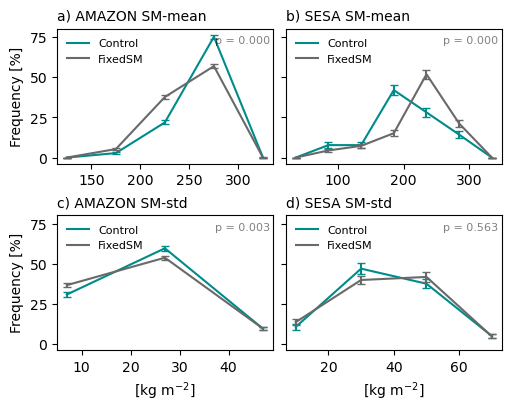

In [33]:
# Create figure and subplots: 
f, axs = plt.subplots(2, 2, figsize=(5,4), sharey=True, layout='constrained'); lw=1.5; 
bingSMstd = np.arange(100,400,50); midSMstd = 0.5*(bingSMstd[1:]+bingSMstd[:-1]); 
#  Amazon
dc1 = (dfilt_env_AB_c[(dfilt_env_AB_c.topo_median<500)&(dfilt_env_AB_c.topo_std<150)].reset_index(drop=True)); 
df1 = (dfilt_env_AB_f[(dfilt_env_AB_f.topo_median<500)&(dfilt_env_AB_f.topo_std<150)].reset_index(drop=True));
plot_SMdist(axs[0,0],dc1,df1,var1='SM_mean_env',var2='SM_mean_env_6hb',levels=np.arange(100,400,50))
plot_SMdist(axs[1,0],dc1,df1,var1='SM_std_env',var2='SM_std_env_6hb',levels=np.arange(-3,70,20))
#  SESA
dc1 = (dfilt_env_SESA_c[(dfilt_env_SESA_c.topo_median<500)&(dfilt_env_SESA_c.topo_std<150)].reset_index(drop=True)); 
df1 = (dfilt_env_SESA_f[(dfilt_env_SESA_f.topo_median<500)&(dfilt_env_SESA_f.topo_std<150)].reset_index(drop=True));
plot_SMdist(axs[1,1],dc1,df1,var1='SM_std_env',var2='SM_std_env_6hb',levels=np.arange(0,100,20))
plot_SMdist(axs[0,1],dc1,df1,var1='SM_mean_env',var2='SM_mean_env_6hb',levels=np.arange(10,400,50))
axs[0,0].set_title('a) AMAZON SM-mean',fontsize=10, loc='left'); axs[0,1].set_title('b) SESA SM-mean',fontsize=10, loc='left');
axs[1,0].set_title('c) AMAZON SM-std',fontsize=10, loc='left'); axs[1,1].set_title('d) SESA SM-std',fontsize=10, loc='left');
axs[1,1].legend(fontsize=8, frameon=False, loc='upper left');axs[0,1].legend(fontsize=8, frameon=False, loc='upper left');
axs[0,0].legend(fontsize=8, frameon=False, loc='upper left');axs[1,0].legend(fontsize=8, frameon=False, loc='upper left');
axs[0,0].set_ylabel('Frequency [%]',fontsize=10); axs[1,0].set_xlabel('[kg m$^{-2}$]',fontsize=10); axs[1,1].set_xlabel('[kg m$^{-2}$]',fontsize=10);
axs[1,0].set_ylabel('Frequency [%]',fontsize=10);


plt.savefig(outplot+"figure3.pdf", format="pdf",dpi=300,  bbox_inches="tight")

### Supplementary Fig 3 (mean TQV distributions)

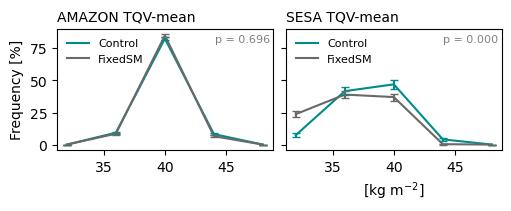

In [35]:
# Create figure and subplots: 
f, axs = plt.subplots(1, 2, figsize=(5,2), sharey=True, layout='constrained'); lw=1.5; 
bingTQV = np.arange(30,54,4); midTQV = 0.5*(bingTQV[1:]+bingTQV[:-1]); 
#  Amazon
dc1 = (dfilt_env_AB_c[(dfilt_env_AB_c.topo_median<500)&(dfilt_env_AB_c.topo_std<150)].reset_index(drop=True)); 
df1 = (dfilt_env_AB_f[(dfilt_env_AB_f.topo_median<500)&(dfilt_env_AB_f.topo_std<150)].reset_index(drop=True));
plot_SMdist(axs[0],dc1,df1,var1='TQV_mean_env',var2='',levels=bingTQV)
#  SESA
dc1 = (dfilt_env_SESA_c[(dfilt_env_SESA_c.topo_median<500)&(dfilt_env_SESA_c.topo_std<150)].reset_index(drop=True)); 
df1 = (dfilt_env_SESA_f[(dfilt_env_SESA_f.topo_median<500)&(dfilt_env_SESA_f.topo_std<150)].reset_index(drop=True));
plot_SMdist(axs[1],dc1,df1,var1='TQV_mean_env',var2='',levels=bingTQV)
axs[0].set_title('AMAZON TQV-mean',fontsize=10, loc='left'); axs[1].set_title('SESA TQV-mean',fontsize=10, loc='left');
axs[0].legend(fontsize=8, frameon=False, loc='upper left');axs[1].legend(fontsize=8, frameon=False, loc='upper left');
axs[0].set_ylabel('Frequency [%]',fontsize=10); 
axs[1].set_xlabel('[kg m$^{-2}$]',fontsize=10); axs[1].set_xlabel('[kg m$^{-2}$]',fontsize=10);

plt.savefig(outplot+"Fig_S3.pdf", format="pdf",dpi=300,  bbox_inches="tight")

### Fig 4 and 5 (Simulations: Contrasting system size distributions in high - low SM regimes) 


In [36]:
def plot_by_regime(axs,dc1,var_x='SM_std_env',var_y='area_ob',bins=bingS,colors=colors_exp['control'],label_high='high SM_std',label_low='low SM_std',error_prop=errorbar_propsc):
    mid_bins = 0.5*(bins[1:]+bins[:-1]); sample =1000;
    
    p1_high = get_hist(dc1[(dc1[var_x]>dc1[var_x].quantile(.5))&(dc1[var_x]<dc1[var_x].quantile(.9))][var_y],bins);
    p1_low  = get_hist(dc1[(dc1[var_x]<dc1[var_x].quantile(.5))&(dc1[var_x]>dc1[var_x].quantile(.1))][var_y],bins);
    axs.plot( p1_high, mid_bins, label=label_high, color=colors, linewidth=lw);
    axs.plot( p1_low, mid_bins, label=label_low,  color=colors, linewidth=lw,ls='--');
    axs.errorbar(p1_high, mid_bins,xerr= np.std(bootstrap_error(dc1[(dc1[var_x]>dc1[var_x].quantile(.5))&(dc1[var_x]<dc1[var_x].quantile(.9))][var_y], bins, sample), axis=0), **error_prop)
    axs.errorbar(p1_low, mid_bins, xerr= np.std(bootstrap_error(dc1[(dc1[var_x]<dc1[var_x].quantile(.5))&(dc1[var_x]>dc1[var_x].quantile(.1))][var_y], bins, sample), axis=0), **error_prop)
    # Compute p-value
    p_value = write_significance(dc1[(dc1[var_x] > dc1[var_x].quantile(0.5)) & (dc1[var_x] < dc1[var_x].quantile(0.9))][var_y],
                                 dc1[(dc1[var_x] < dc1[var_x].quantile(0.5)) & (dc1[var_x] > dc1[var_x].quantile(0.1))][var_y])

    # Annotate p-value with decimal format
    axs.annotate(f'p = {p_value:.3f}', xy=(0.5, 0.8), xycoords='axes fraction', fontsize=8, 
                 verticalalignment='top', horizontalalignment='left',alpha=0.5)


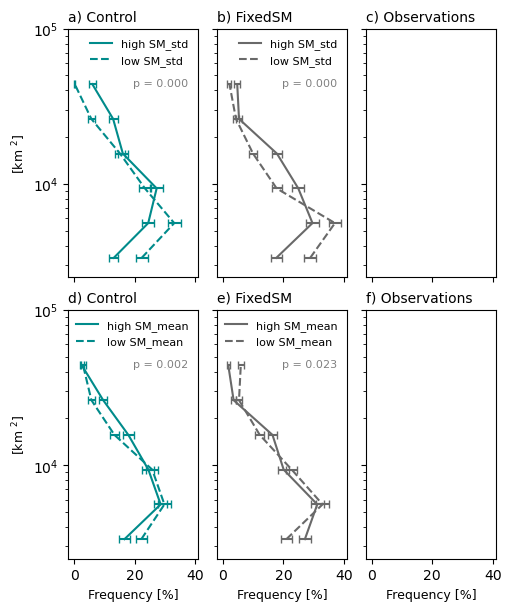

In [37]:
bingS = (np.logspace(np.log10(2500),np.log10(5.5e4),7));  var_x='SM_std_env';var_y='area_ob';

dc1_ab = (dfilt_env_AB_c[(dfilt_env_AB_c.topo_median<500)&(dfilt_env_AB_c.topo_std<150)].reset_index(drop=True))#.groupby('cell').mean(); 
df1_ab = (dfilt_env_AB_f[(dfilt_env_AB_f.topo_median<500)&(dfilt_env_AB_f.topo_std<150)].reset_index(drop=True))#.groupby('cell').mean();

f, axs = plt.subplots(2, 3, figsize=(5, 6),layout='constrained',sharey=True,sharex=True);
plot_by_regime(axs[0,0],dc1_ab,colors=colors_exp['control'],error_prop=errorbar_propsc, bins=bingS);
plot_by_regime(axs[0,1],df1_ab,colors=colors_exp['fixedSM'],error_prop=errorbar_propsf, bins=bingS)

plot_by_regime(axs[1,0],dc1_ab,colors=colors_exp['control'],var_x='SM_mean_env',label_high= 'high SM_mean', label_low='low SM_mean',error_prop=errorbar_propsc, bins=bingS);
plot_by_regime(axs[1,1],df1_ab,colors=colors_exp['fixedSM'],var_x='SM_mean_env',label_high= 'high SM_mean', label_low='low SM_mean',error_prop=errorbar_propsf, bins=bingS)

axs[0,0].legend(fontsize=8, frameon=False, loc='upper right'); axs[1,0].legend(fontsize=8, frameon=False, loc='upper right');
axs[0,1].legend(fontsize=8, frameon=False, loc='upper right'); axs[1,1].legend(fontsize=8, frameon=False, loc='upper right');
axs[0,0].set_yscale('log'); axs[0,0].set_ylim(2500,1e5)

axs[0,0].set_title('a) Control',fontsize=10, loc='left'); axs[0,1].set_title('b) FixedSM',fontsize=10, loc='left'); axs[0,2].set_title('c) Observations',fontsize=10, loc='left');  
axs[1,0].set_title('d) Control',fontsize=10, loc='left'); axs[1,1].set_title('e) FixedSM',fontsize=10, loc='left'); axs[1,2].set_title('f) Observations',fontsize=10, loc='left');  
axs[0,0].set_ylabel('[km $^{2}$]',fontsize=9); axs[1,0].set_ylabel('[km $^{2}$]',fontsize=9); 
axs[1,0].set_xlabel('Frequency [%]',fontsize=9); axs[1,1].set_xlabel('Frequency [%]',fontsize=9);  axs[1,2].set_xlabel('Frequency [%]',fontsize=9); 

plt.savefig(outplot+"Fig4_simulations.pdf", format="pdf",dpi=300,  bbox_inches="tight")

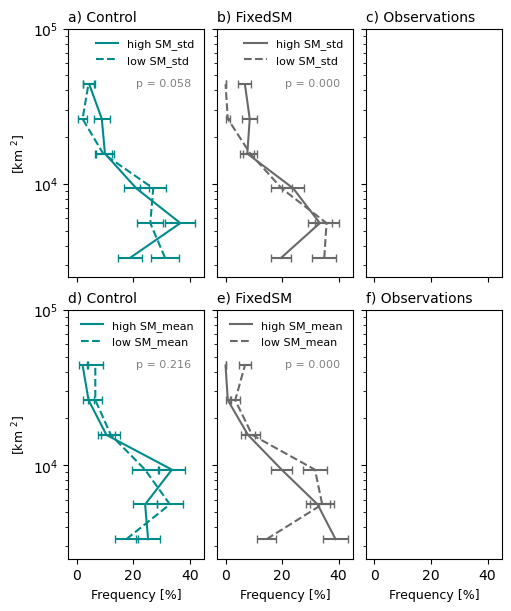

In [39]:
bingS = (np.logspace(np.log10(2500),np.log10(5.5e4),7));  var_x='SM_std_env';var_y='area_ob';

dc1_sesa = (dfilt_env_SESA_c[(dfilt_env_SESA_c.topo_median<500)&(dfilt_env_SESA_c.topo_std<150)].reset_index(drop=True))#.groupby('cell').mean(); 
df1_sesa = (dfilt_env_SESA_f[(dfilt_env_SESA_f.topo_median<500)&(dfilt_env_SESA_f.topo_std<150)].reset_index(drop=True))#.groupby('cell').mean();

f, axs = plt.subplots(2, 3, figsize=(5, 6),layout='constrained',sharey=True,sharex=True);
plot_by_regime(axs[0,0],dc1_sesa,colors=colors_exp['control'],error_prop=errorbar_propsc, bins=bingS);
plot_by_regime(axs[0,1],df1_sesa,colors=colors_exp['fixedSM'],error_prop=errorbar_propsf, bins=bingS)

plot_by_regime(axs[1,0],dc1_sesa,colors=colors_exp['control'],var_x='SM_mean_env',label_high= 'high SM_mean', label_low='low SM_mean',error_prop=errorbar_propsc, bins=bingS);
plot_by_regime(axs[1,1],df1_sesa,colors=colors_exp['fixedSM'],var_x='SM_mean_env',label_high= 'high SM_mean', label_low='low SM_mean',error_prop=errorbar_propsf, bins=bingS)

axs[0,0].legend(fontsize=8, frameon=False, loc='upper right'); axs[1,0].legend(fontsize=8, frameon=False, loc='upper right');
axs[0,1].legend(fontsize=8, frameon=False, loc='upper right'); axs[1,1].legend(fontsize=8, frameon=False, loc='upper right');
axs[0,0].set_yscale('log'); axs[0,0].set_ylim(2500,1e5); axs[0,0].set_xlim(-3,45)

axs[0,0].set_title('a) Control',fontsize=10, loc='left'); axs[0,1].set_title('b) FixedSM',fontsize=10, loc='left'); axs[0,2].set_title('c) Observations',fontsize=10, loc='left');  
axs[1,0].set_title('d) Control',fontsize=10, loc='left'); axs[1,1].set_title('e) FixedSM',fontsize=10, loc='left'); axs[1,2].set_title('f) Observations',fontsize=10, loc='left');  
axs[0,0].set_ylabel('[km $^{2}$]',fontsize=9); axs[1,0].set_ylabel('[km $^{2}$]',fontsize=9); 
axs[1,0].set_xlabel('Frequency [%]',fontsize=9); axs[1,1].set_xlabel('Frequency [%]',fontsize=9);  axs[1,2].set_xlabel('Frequency [%]',fontsize=9); 

plt.savefig(outplot+"Fig5_simulations.pdf", format="pdf",dpi=300,  bbox_inches="tight")